In [1]:
#This cell may take a little time to run... be patient!
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from klampt import *
from klampt.vis.ipython import KlamptWidget
from klampt.math import se3,so3,vectorops
import math

#set up the world with a robot and an environment model
world = WorldModel()
cabinets = world.makeTerrain('cabinets')
cabinets.geometry().loadFile('data/kitchen/MAB 1.obj')
cabinets.geometry().transform(so3.rotation([1,0,0],math.pi/2),[0,0,0])
cabinets.geometry().scale(0.01)
cabinets.geometry().transform(so3.identity(),[1.56,4.49,1.365])
cabinets.appearance().setColor(0.75,0.75,0.75)
table = world.makeTerrain('table')
table.geometry().loadFile('data/kitchen/Dining Table v1.obj')
table.geometry().scale(0.03)
table.geometry().transform(so3.identity(),[1.0,-0.5,0.915])
table.appearance().setColor(0.5,0.3,0.1)
robot = world.makeRigidObject('robot')
geom = robot.geometry()
geom.loadFile('data/Segway_One_Piece.stl')
geom.scale(0.05)
geom.transform(so3.identity(),[0.45,0.6,0])
robot.appearance().setColor(1,0.5,0)

#set up the obstacles list
obstacles = [cabinets.geometry(),table.geometry()]

#pop up the visualization
kvis=KlamptWidget(world)
display(kvis)

***  klampt.vis: using Qt5 as the visualization backend  ***


KlamptWidget(scene={'metadata': {'version': 4.4, 'type': 'Object', 'fullscene': True, 'generator': 'Klampt thr…

In [2]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

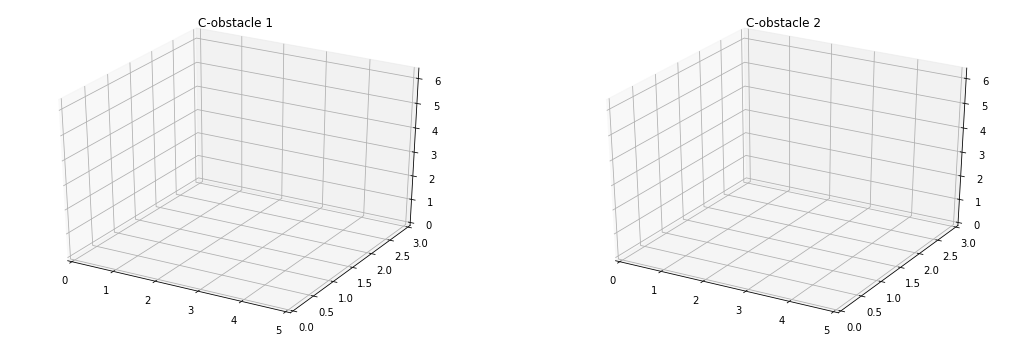

In [5]:
#your grid should range over these x,y,theta ranges with the given resolution
xrange = [0,5]
yrange = [0,3]
thetarange = [0,math.pi*2]

xdivs = 25
ydivs = 15
thetadivs = 16

#if you'd like, you can uncomment these lines to check fewer configurations
#xdivs = 5
#ydivs = 3
#thetadivs = 4

#Visualization code... don't touch this unless you really know what you're doing
numPointGroups = 0
fig = plt.figure(figsize=(18,6))
axs = fig.subplots(1,len(obstacles), subplot_kw ={'projection':'3d'})
def add_points(q_points,color):
    global numPointGroups,xrange,yrange,thetarange
    if len(q_points) > 0:
        x,y,z = zip(*q_points)
        colors = [(color[0]*q[2]/thetarange[1],color[1]*q[2]/thetarange[1],color[2]*q[2]/thetarange[1]) for q in q_points]    
        axs[numPointGroups].scatter(x,y,z,c=colors)
    axs[numPointGroups].set_xlim(*xrange)
    axs[numPointGroups].set_ylim(*yrange)
    axs[numPointGroups].set_zlim(*thetarange)
    axs[numPointGroups].set_title("C-obstacle "+str(numPointGroups+1))
    numPointGroups += 1
import random
    
#TODO: PUT YOUR CODE HERE
for obstacle in obstacles:
    opts = []
    #TODO compute the C-obstacle
    add_points(opts,[random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])

plt.show()